<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad6__unidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

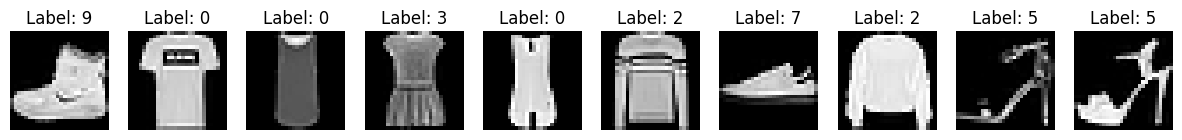

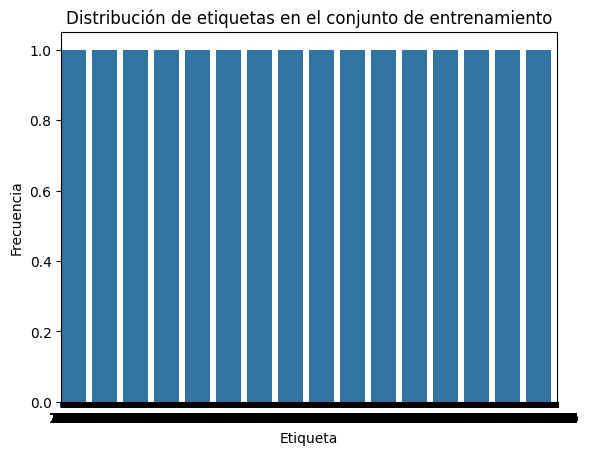

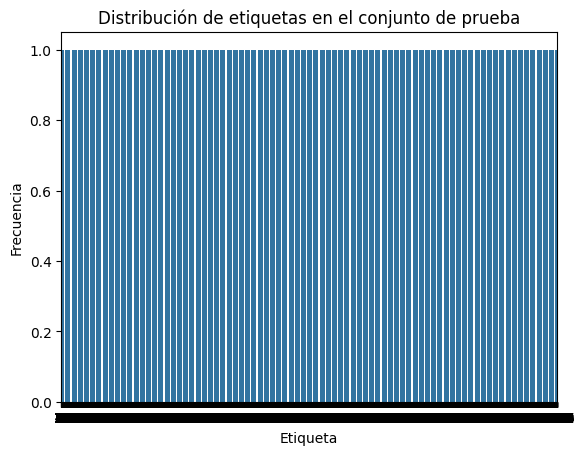

label Sandalia
imagen [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  13  62 

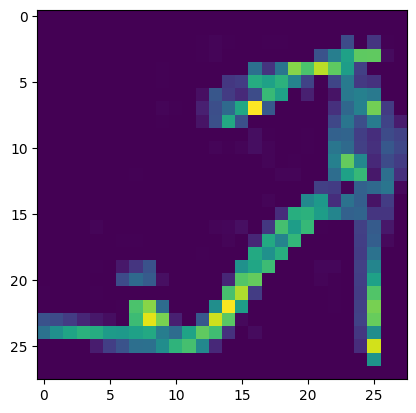

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#cargar el conjunto de datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

categorias={0:'Camiseta',1:'Pantalon',2:'Sueter',3:'Vestido',4:'Abrigo',5:'Sandalia',6:'Camisa',7:'Zapatilla de deporte',8:'Bolsa',9:'Botin'}

# Visualizar las primeras 10 imágenes de entrenamiento
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i]}')
    axes[i].axis('off')
plt.show()

# Distribución de etiquetas de entrenamiento
sns.countplot(train_labels)
plt.title('Distribución de etiquetas en el conjunto de entrenamiento')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de etiquetas de prueba
sns.countplot(test_labels)
plt.title('Distribución de etiquetas en el conjunto de prueba')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

#visualizar un conjunto de datos
index=8
np.set_printoptions(linewidth=200)
print('label',categorias[train_labels[index]])
print('imagen',train_images[index])
plt.imshow(train_images[index])


#normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0



In [ ]:
#creacion del modelo
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(68, activation='relu'), # Esta la agregue
    keras.layers.Dense(10, activation='softmax')
])

#compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#entrenar el modelo
#history=model.fit(train_images, train_labels, epochs=10,verbose=False)
history=model.fit(train_images, train_labels, epochs=20,verbose=False)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 68)                8772      
                                                                 
 dense_12 (Dense)            (None, 10)                690       
                                                                 
Total params: 109942 (429.46 KB)
Trainable params: 109942 (429.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1875/1875 - 3s - loss: 0.1575 - accuracy: 0.9395 - 3s/epoch - 2ms/step
perdida en el conjunto de entrenamiento: 0.15746304392814636
Precision en el conjunto de entrenamiento: 0.9395166635513306
313/313 - 1s - loss: 0.3540 - accuracy: 0.8913 - 998ms/epoch - 3ms/step
perdida en el conjunto de prueba: 0.3540193736553192
Precision en el conjunto de prueba: 0.8913000226020813


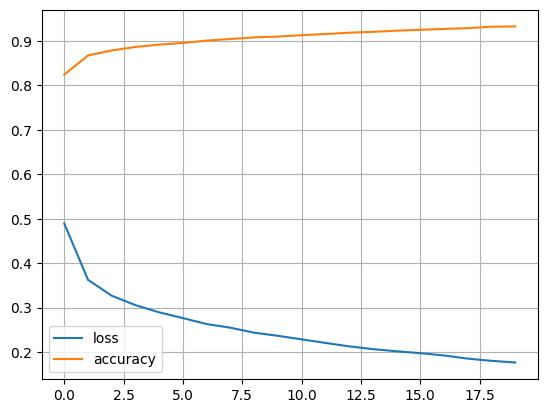

In [ ]:
#graficar el historial del modelo
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

#evaluar el modelo
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)
print('perdida en el conjunto de entrenamiento:', test_loss)
print('Precision en el conjunto de entrenamiento:', test_acc)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('perdida en el conjunto de prueba:', test_loss)
print('Precision en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 3ms/step
Matriz de confusión:
 [[811   3  18  37   3   0 118   0  10   0]
 [  1 982   1  13   0   0   1   1   1   0]
 [ 18   1 782  11 128   0  56   1   3   0]
 [ 18   8   7 924  23   0  17   0   3   0]
 [  1   0  66  42 849   0  40   0   2   0]
 [  0   0   0   1   0 959   0  22   2  16]
 [ 99   0  81  34  82   0 694   0  10   0]
 [  0   0   0   0   0   9   0 966   1  24]
 [  5   1   2   4   5   1   5   2 975   0]
 [  0   0   0   1   0   5   1  22   0 971]]


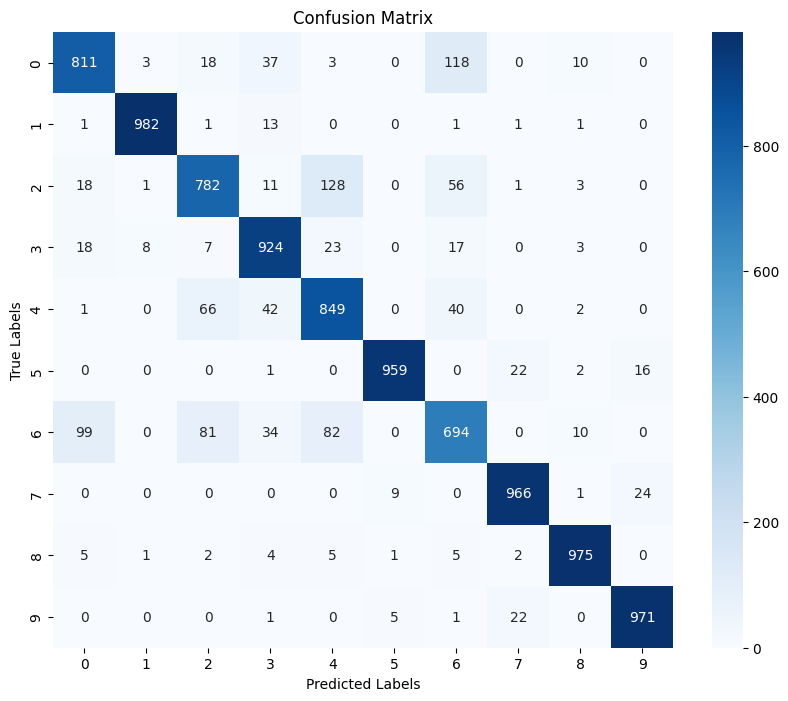

F1-Score: 0.8907281092172118
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.87      0.92      0.89      1000
           4       0.78      0.85      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.69      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Total de errores: 1087
Indices de errores: [  12   23   25 ... 9972 9981 9989]


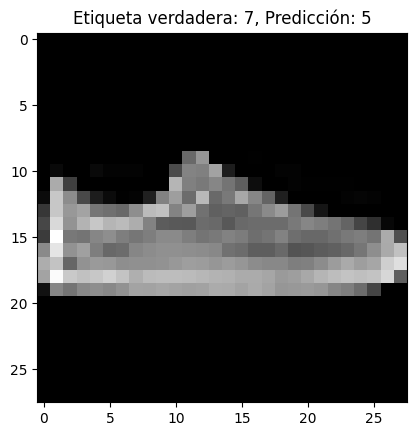

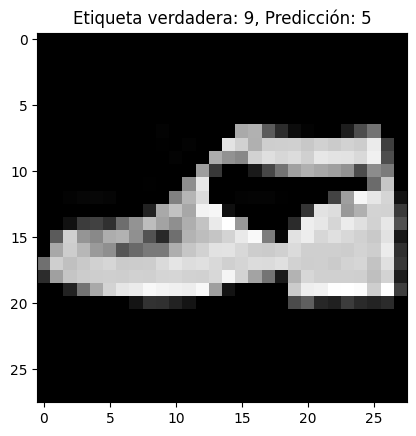

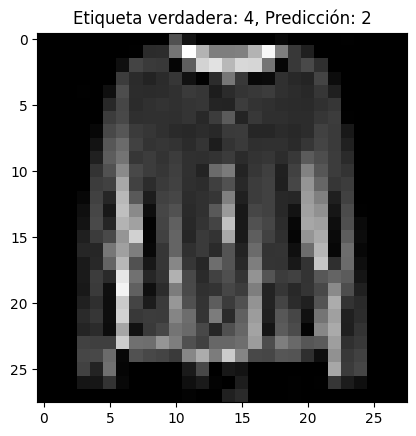

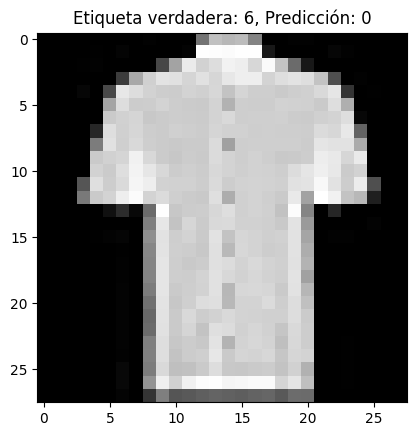

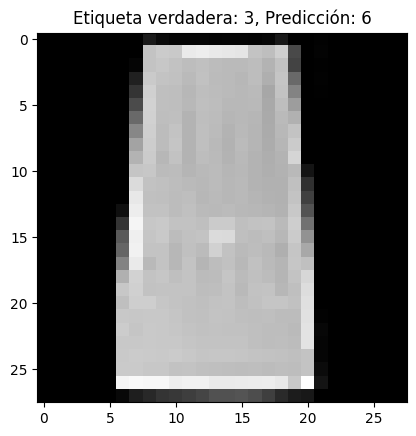

label Vestido
1/1 [==============================] - 0s 68ms/step
clasificacion Camisa


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Predicciones
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
print("Matriz de confusión:\n", cm)

# Gráfico de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# F1-Score
f1 = f1_score(test_labels, predicted_labels, average='weighted')
print("F1-Score:", f1)

# Reporte de clasificación (incluye precision, recall y f1-score para cada clase)
report = classification_report(test_labels, predicted_labels)
print("Reporte de clasificación:\n", report)

# Distribución de errores
errors = predicted_labels != test_labels
error_indices = np.where(errors)[0]

print(f"Total de errores: {len(error_indices)}")
print(f"Indices de errores: {error_indices}")

# Visualizar algunas imágenes mal clasificadas
num_errors_to_display = 5
for i in range(min(len(error_indices), num_errors_to_display)):
    index = error_indices[i]
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')  # Ajusta según el tamaño de la imagen
    plt.title(f"Etiqueta verdadera: {test_labels[index]}, Predicción: {predicted_labels[index]}")
    plt.show()

#Prediccion
print('label',categorias[test_labels[index]])
clasificacion=model.predict(test_images[index:index+1])
clasificacion=clasificacion.reshape(-1,1)
if clasificacion[0]>clasificacion[1] and clasificacion[0]>clasificacion[2] and clasificacion[0]>clasificacion[3] and clasificacion[0]>clasificacion[4] and clasificacion[0]>clasificacion[5] and clasificacion[0]>clasificacion[6] and clasificacion[0]>clasificacion[7] and clasificacion[0]>clasificacion[8]and clasificacion[0]>clasificacion[9]:
  print('clasificacion',categorias[0])
elif clasificacion[1]>clasificacion[0] and clasificacion[1]>clasificacion[2] and clasificacion[1]>clasificacion[3] and clasificacion[1]>clasificacion[4] and clasificacion[1]>clasificacion[5] and clasificacion[1]>clasificacion[6] and clasificacion[1]>clasificacion[7] and clasificacion[1]>clasificacion[8]and clasificacion[1]>clasificacion[9]:
    print('clasificacion',categorias[1])
elif clasificacion[2]>clasificacion[0] and clasificacion[2]>clasificacion[1] and clasificacion[2]>clasificacion[3] and clasificacion[2]>clasificacion[4] and clasificacion[2]>clasificacion[5] and clasificacion[2]>clasificacion[6] and clasificacion[2]>clasificacion[7] and clasificacion[2]>clasificacion[8]and clasificacion[2]>clasificacion[9]:
    print('clasificacion',categorias[2])
elif clasificacion[3]>clasificacion[0] and clasificacion[3]>clasificacion[1] and clasificacion[3]>clasificacion[2] and clasificacion[3]>clasificacion[4] and clasificacion[3]>clasificacion[5] and clasificacion[3]>clasificacion[6] and clasificacion[3]>clasificacion[7] and clasificacion[3]>clasificacion[8]and clasificacion[3]>clasificacion[9]:
    print('clasificacion',categorias[3])
elif clasificacion[4]>clasificacion[0] and clasificacion[4]>clasificacion[1] and clasificacion[4]>clasificacion[2] and clasificacion[4]>clasificacion[3] and clasificacion[4]>clasificacion[5] and clasificacion[4]>clasificacion[6] and clasificacion[4]>clasificacion[7] and clasificacion[4]>clasificacion[8]and clasificacion[4]>clasificacion[9]:
    print('clasificacion',categorias[4])
elif clasificacion[5]>clasificacion[0] and clasificacion[5]>clasificacion[1] and clasificacion[5]>clasificacion[2] and clasificacion[5]>clasificacion[3] and clasificacion[5]>clasificacion[4] and clasificacion[5]>clasificacion[6] and clasificacion[5]>clasificacion[7] and clasificacion[5]>clasificacion[8]and clasificacion[5]>clasificacion[9]:
    print('clasificacion',categorias[5])
elif clasificacion[6]>clasificacion[0] and clasificacion[6]>clasificacion[1] and clasificacion[6]>clasificacion[2] and clasificacion[6]>clasificacion[3] and clasificacion[6]>clasificacion[4] and clasificacion[6]>clasificacion[5] and clasificacion[6]>clasificacion[7] and clasificacion[6]>clasificacion[8]and clasificacion[6]>clasificacion[9]:
    print('clasificacion',categorias[6])
elif clasificacion[7]>clasificacion[0] and clasificacion[7]>clasificacion[1] and clasificacion[7]>clasificacion[2] and clasificacion[7]>clasificacion[3] and clasificacion[7]>clasificacion[4] and clasificacion[7]>clasificacion[5] and clasificacion[7]>clasificacion[6] and clasificacion[7]>clasificacion[8]and clasificacion[7]>clasificacion[9]:
    print('clasificacion',categorias[7])
elif clasificacion[8]>clasificacion[0] and clasificacion[8]>clasificacion[1] and clasificacion[8]>clasificacion[2] and clasificacion[8]>clasificacion[3] and clasificacion[8]>clasificacion[4] and clasificacion[8]>clasificacion[5] and clasificacion[8]>clasificacion[6] and clasificacion[8]>clasificacion[7]and clasificacion[8]>clasificacion[9]:
    print('clasificacion',categorias[8])
elif clasificacion[9]>clasificacion[0] and clasificacion[9]>clasificacion[1] and clasificacion[9]>clasificacion[2] and clasificacion[9]>clasificacion[3] and clasificacion[9]>clasificacion[4] and clasificacion[9]>clasificacion[5] and clasificacion[9]>clasificacion[6] and clasificacion[9]>clasificacion[7]and clasificacion[9]>clasificacion[8]:
    print('clasificacion',categorias[9])



